In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


In [42]:
df = data = pd.read_csv("CleanData/2017/data.csv")
df.sample(5)

# Afficher les prédictions
count = df['Tendance'].value_counts()

print(count)

Tendance
droite    24303
gauche    10511
Name: count, dtype: int64


In [43]:

loire = df.loc[df['Code du département'] == '93']

# Afficher les prédictions
count = loire['Tendance'].value_counts()

print(count)

loire.to_csv("./CleanData/loire.csv", index=False);

df = data.drop(data[data['Code du département'] == '93'].index)

display(df[df['Code du département'] == '93'])

df = df.drop([
'codgeo',
'Code du département',
'Population Total',
'Nombre de chômeurs de 15 à 64 ans',
'Population Active'], axis=1)


,codgeo,Taux Voitures Menage,Tendance,Voix,Code du département,Revenus,Nombre de chômeurs de 15 à 64 ans,Population Active,Taux Chomage,Population Total,Taux scolarisées,Taux Creation Entreprise
574,23096,0.272097,gauche,3885,23,20710,989.642035,5977.623588,0.165558,13764,0.379652,9.5
1577,23176,0.255552,gauche,1688,23,19850,342.650169,1988.093296,0.172351,5448,0.481978,7.3
2444,23008,0.205835,gauche,1055,23,18620,269.739160,1359.775394,0.198370,3551,0.406526,5.6
3845,23030,0.283291,gauche,641,23,17760,174.937472,884.654630,0.197747,2787,0.348006,11.6
4079,23193,0.555556,gauche,935,23,23610,83.289037,1089.760358,0.076429,2526,0.338674,6.5
...,...,...,...,...,...,...,...,...,...,...,...,...
33934,23110,0.434783,gauche,32,23,22461,3.000000,22.000000,0.136364,58,0.000000,0.0
34020,23119,0.590909,droite,17,23,22461,1.000000,19.000000,0.052632,44,0.000000,0.0
34397,23055,0.647059,gauche,19,23,22461,1.000000,11.000000,0.090909,32,1.000000,0.0
34582,23019,0.642857,gauche,21,23,22461,1.000000,13.000000,0.076923,25,0.000000,0.0


In [44]:
dummy = pd.get_dummies (df ['Tendance'])
df = pd.concat( [df, dummy ], axis = 1)
df = df.drop( ['Tendance'], axis = 1)

## Visualisation

<Axes: title={'center': 'Correlation matrix heatmap'}>

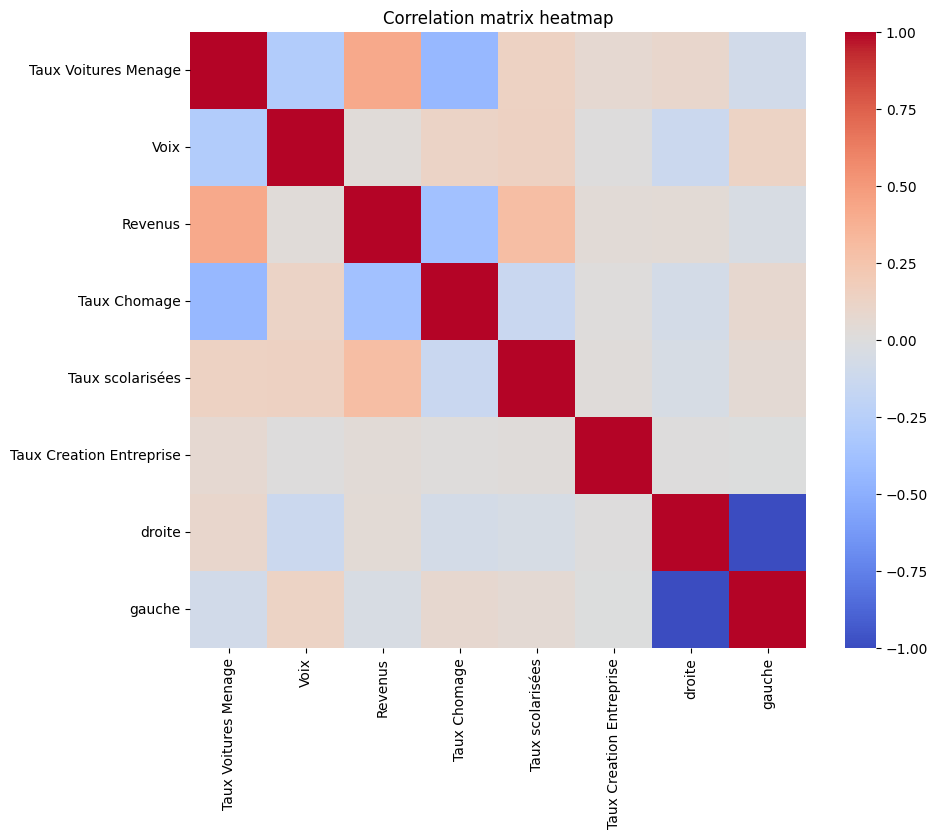

In [45]:
import seaborn as sns
fig, ax = plt.subplots(figsize = (10, 8))
plt.title('Correlation matrix heatmap')
correlation = df.corr()
sns.heatmap(
data = correlation,
square = True,
cmap = 'coolwarm',
ax = ax
)

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

X = df.drop(["gauche", "droite"], axis=1)
Y = df[["gauche", "droite"]]


x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Convertir Y en un tableau 1D
y_train = y_train.idxmax(axis=1)
y_test = y_test.idxmax(axis=1)

display(x_test)
display(y_train)
display(y_test)

,Taux Voitures Menage,Voix,Revenus,Taux Chomage,Taux scolarisées,Taux Creation Entreprise
19243,0.664596,146,26150,0.112347,0.584573,9.1
16500,0.634615,151,21780,0.118519,0.200000,26.1
11930,0.532308,359,23450,0.100649,0.470588,8.3
34658,0.583333,13,22461,0.000000,0.000000,0.0
1461,0.400943,1650,22820,0.104092,0.400243,11.2
...,...,...,...,...,...,...
27447,0.426667,53,18100,0.109091,0.600000,20.0
33615,0.692308,30,22461,0.111111,0.200000,0.0
30952,0.510204,41,18240,0.153846,0.400000,18.2
4589,0.587873,1067,28160,0.097557,0.753613,8.5


17350    droite
6808     droite
14948    droite
6226     droite
22842    droite
          ...  
17052    gauche
6430     droite
11478    gauche
879      droite
15997    gauche
Length: 27685, dtype: object

19243    droite
16500    droite
11930    droite
34658    gauche
1461     gauche
          ...  
27447    droite
33615    droite
30952    droite
4589     gauche
5687     droite
Length: 6922, dtype: object

In [47]:
feature_names = df.drop(["droite", "gauche"], axis=1).columns.tolist()
feature_names

['Taux Voitures Menage',
 'Voix',
 'Revenus',
 'Taux Chomage',
 'Taux scolarisées',
 'Taux Creation Entreprise']

In [48]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

print(df.isna().sum())

tree_dc = DecisionTreeClassifier(max_depth=5, random_state=42);
tree_dc.fit(x_train, y_train);

y_pred = tree_dc.predict(x_test);
print(accuracy_score(y_test, y_pred))

Taux Voitures Menage        0
Voix                        0
Revenus                     0
Taux Chomage                0
Taux scolarisées            0
Taux Creation Entreprise    0
droite                      0
gauche                      0
dtype: int64
0.7021092169893095


In [49]:
from sklearn.ensemble import RandomForestClassifier


rd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1, max_depth=2, random_state=42)
rd_clf.fit(x_train, y_train);

In [50]:
print("Ordre d'importance des features")
for name, score in zip(feature_names, rd_clf.feature_importances_):
    print('%s: %i%%' %(name, int(score*100)))

Ordre d'importance des features
Taux Voitures Menage: 23%
Voix: 45%
Revenus: 4%
Taux Chomage: 3%
Taux scolarisées: 14%
Taux Creation Entreprise: 9%


In [51]:

from sklearn.ensemble import AdaBoostClassifier


ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=4), n_estimators=200, learning_rate=0.2, random_state=42)

ada_clf.fit(x_train, y_train)

y_pred_ada = ada_clf.predict(x_test)
print('score Adaboost :' , accuracy_score(y_test, y_pred_ada))

score Adaboost : 0.6969084079745739


In [52]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [None, 1, 2, 6, 8],
    'n_estimators': [50, 100, 150, 200, 500, 1000, 1500],
    'learning_rate': [0.1, 0.2, 0.4],
}
# Créer un objet GradientBoostingClassifier avec des valeurs arbitraires pour les hyperparamètres
clf = GradientBoostingClassifier(max_depth=2, n_estimators=100, learning_rate=0.1, n_iter_no_change=5, tol=0.0001)

# Effectuer une recherche de grille
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=2, error_score='raise')
grid_search.fit(x_train, y_train)

# Afficher les meilleures valeurs d'hyperparamètres
print(grid_search.best_params_)

# Entraîner un GradientBoostingClassifier avec les meilleures valeurs d'hyperparamètres
best_clf = GradientBoostingClassifier(**grid_search.best_params_)
best_clf.fit(x_train, y_train)

accuracy = best_clf.score(x_test, y_test)
print(f"Accuracy : {accuracy:.2f}")

KeyboardInterrupt: 

In [53]:

x_new = pd.read_csv("./CleanData/loire.csv")

tendances = x_new['Tendance']
communes = x_new['codgeo']

x_new = x_new.drop([
'codgeo',
'Code du département',
'Tendance',
'Population Total',
'Nombre de chômeurs de 15 à 64 ans',
'Population Active'], axis=1)


# Effectuer des prédictions sur les nouvelles données
predictions = ada_clf.predict(x_new)

tests = pd.concat([x_new, pd.Series(predictions)], axis=1)
tests = pd.concat([tests, tendances], axis=1)

# Afficher les prédictions
unique_values, counts = np.unique(predictions, return_counts=True)

good = 0
total = 0

for i, (predicted_class, tendance, com) in enumerate(zip(predictions, tendances, communes)):
    print(f"Donnée {i+1}: Commune : {com} Tendance = {tendance}, Classe prédite = {predicted_class}")


    if predicted_class == tendance:
        good = good + 1

    total = total + 1

print("Pourcentage ", good/total)

print(unique_values)
print(tendances.value_counts())
print(counts)

Donnée 1: Commune : 44109 Tendance = gauche, Classe prédite = gauche
Donnée 2: Commune : 44184 Tendance = gauche, Classe prédite = droite
Donnée 3: Commune : 44162 Tendance = gauche, Classe prédite = droite
Donnée 4: Commune : 44143 Tendance = gauche, Classe prédite = gauche
Donnée 5: Commune : 44190 Tendance = gauche, Classe prédite = gauche
Donnée 6: Commune : 44114 Tendance = gauche, Classe prédite = gauche
Donnée 7: Commune : 44215 Tendance = gauche, Classe prédite = droite
Donnée 8: Commune : 44047 Tendance = gauche, Classe prédite = droite
Donnée 9: Commune : 44055 Tendance = droite, Classe prédite = droite
Donnée 10: Commune : 44026 Tendance = gauche, Classe prédite = gauche
Donnée 11: Commune : 44035 Tendance = gauche, Classe prédite = droite
Donnée 12: Commune : 44020 Tendance = gauche, Classe prédite = gauche
Donnée 13: Commune : 44131 Tendance = droite, Classe prédite = gauche
Donnée 14: Commune : 44069 Tendance = gauche, Classe prédite = droite
Donnée 15: Commune : 44172 Te